# Polynomial Regression

### Moore's law: Number of transistors in a dense integrated circuit doubles approximately every two years. 

## 1. Polynomial Regression Theory

## 2. Importing dataset and data preprocessing

### 2.1. Dataset import

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Let's import dataset from csv file
dataset = pd.read_csv('../../00_Datasets/GPUs/All_GPUs.csv')

### 2.2. Let's summarize the Dataset

In [8]:
dataset.head()

,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,...,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
0,Tesla G92b,NaN,NaN,738 MHz,2.0,Yes,DX 10.0,NaN,0.0,No,...,55nm,16,\n01-Mar-2009,NaN,2560x1600,Yes,4.0,64.0,47 GTexel/s,0.0
1,R600 XT,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n14-May-2007,NaN,2560x1600,Yes,4.0,16.0,12 GTexel/s,0.0
2,R600 PRO,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,80nm,16,\n07-Dec-2007,NaN,2560x1600,Yes,4.0,16.0,10 GTexel/s,0.0
3,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n01-Jul-2007,NaN,2560x1600,Yes,4.0,8.0,7 GTexel/s,0.0
4,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,...,65nm,4,\n28-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 34 columns):
Architecture              3344 non-null object
Best_Resolution           2764 non-null object
Boost_Clock               1446 non-null object
Core_Speed                3406 non-null object
DVI_Connection            2656 non-null float64
Dedicated                 3392 non-null object
Direct_X                  3400 non-null object
DisplayPort_Connection    857 non-null float64
HDMI_Connection           2643 non-null float64
Integrated                3392 non-null object
L2_Cache                  3406 non-null object
Manufacturer              3406 non-null object
Max_Power                 2781 non-null object
Memory                    2986 non-null object
Memory_Bandwidth          3285 non-null object
Memory_Bus                3344 non-null object
Memory_Speed              3301 non-null object
Memory_Type               3350 non-null object
Name                      3406 non-null objec

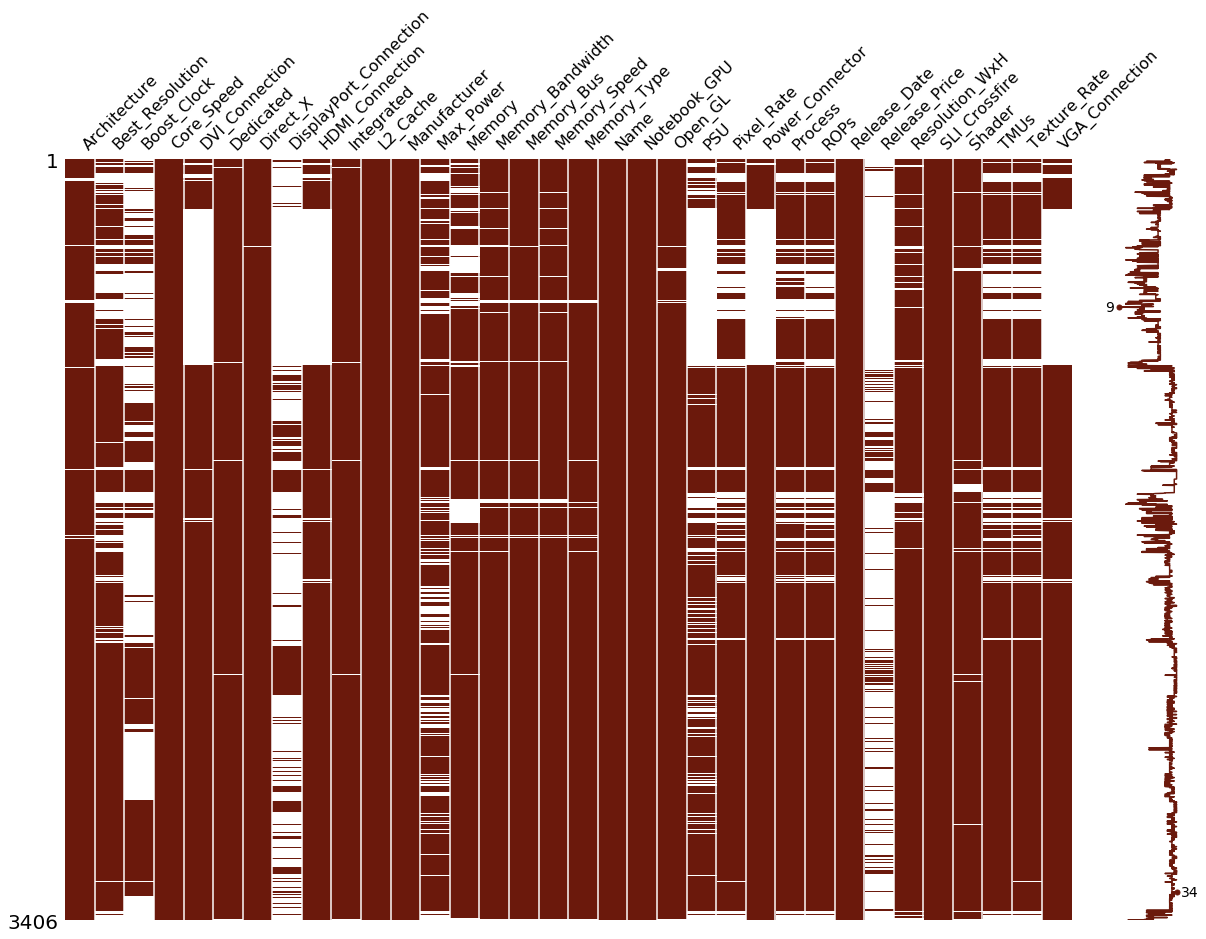

In [10]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=dataset, figsize=(20, 14), color=(0.42, 0.1, 0.05))